In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing data

data = pd.read_excel("C:/Users/savin/Downloads/train.xlsx")
data

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [3]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
 data.shape

(14999, 9)

In [5]:
#Assigning each category a number for category feature
category = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data["category"]=data["category"].map(category)
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [6]:
#Removing character "F" present in data
data=data[data.views!='F']
data=data[data.likes!='F']
data=data[data.dislikes!='F']
data=data[data.comment!='F']

In [7]:
#Convert values to integers for views, lies, comment, dislikes and adview
data["views"]=pd.to_numeric(data["views"])
data["comment"]=pd.to_numeric(data["comment"])
data["likes"]=pd.to_numeric(data["likes"])
data["dislikes"]=pd.to_numeric(data["dislikes"])
data["adview"]=pd.to_numeric(data["adview"])

In [8]:
column_vidid=data['vidid']

In [9]:
from sklearn.preprocessing import LabelEncoder
data['vidid']=LabelEncoder().fit_transform(data['vidid'])
data['published']=LabelEncoder().fit_transform(data['published'])

c:\Users\savin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,PT7M37S,6
1,2741,2,1707,56,2,6,2185,PT9M30S,4
2,8138,1,2023,25,0,2,2094,PT2M16S,3
3,9005,6,620860,777,161,153,2119,PT4M22S,8
4,122,1,666,1,0,0,2091,PT31S,4


In [11]:
# Convert time in sec for duration
import re
def convert_duration_to_seconds(duration):
    pattern = re.compile(r'PT(?:(\d+)M)?(?:(\d+)S)?')
    match = pattern.match(duration)
    if not match:
        return 0
    minutes = int(match.group(1) or 0)
    seconds = int(match.group(2) or 0)
    return minutes * 60 + seconds

data['duration'] = data['duration'].apply(convert_duration_to_seconds)

In [12]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


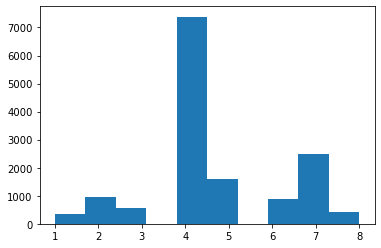

In [13]:
#Visualization
#Individual plots
plt.hist(data['category'])
plt.show()

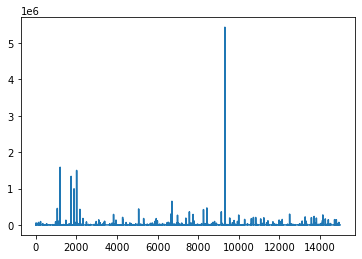

In [14]:
plt.plot(data['adview'])
plt.show()

In [15]:
#Remove videos with adview greater than 2000000 as outlier
data = data[data['adview']<2000000]

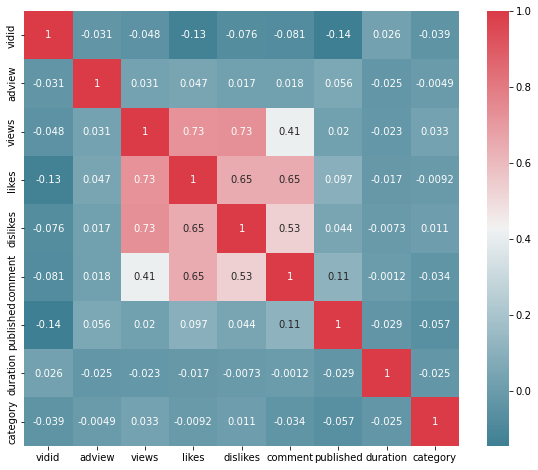

In [16]:
#Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220,10,as_cmap=True),
            square=True,ax=ax,annot=True)
plt.show()

In [17]:
#Split data
Y_train = pd.DataFrame(data=data.iloc[:,1].values, columns = ['target'])
data=data.drop(['adview'],axis=1)
data=data.drop(['vidid'],axis=1)
data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [19]:
#Normalise data 
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [20]:
#Evaluation metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction= model_name.predict(X_test)
    print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, prediction))
    print("Mean Squared Error: ",metrics.mean_squared_error(y_test, prediction))
    print("Root Mean Squared Error: ",np.sqrt(metrics.mean_absolute_error(y_test, prediction)))
    

In [21]:
#Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

Mean Absolute Error:  3764.6859705535176
Mean Squared Error:  835466224.7234348
Root Mean Squared Error:  61.357036846261714


In [22]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test,decision_tree)

Mean Absolute Error:  2355.902663934426
Mean Squared Error:  631074673.9907787
Root Mean Squared Error:  48.53764172201227


In [23]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators= n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train, y_train)
print_error(X_test, y_test, random_forest)

C:\Users\savin\AppData\Local\Temp\ipykernel_26316\385196743.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Mean Absolute Error:  3336.890075475195
Mean Squared Error:  494832229.0909857
Root Mean Squared Error:  57.765820997153625


In [24]:
#Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)


c:\Users\savin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error:  3764.6859705535176
Mean Squared Error:  835466224.7234348
Root Mean Squared Error:  61.357036846261714


In [25]:
#Artificial Neural Network
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
    Dense(10, activation="relu",
         input_shape=X_train.shape[1:]),
    Dense(10,activation="relu"),
    Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train, y_train,epochs=100)
ann.summary()

print_error(X_test, y_test, ann)

c:\Users\savin\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 344185696.0000 - mean_squared_error: 344185696.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 601017216.0000 - mean_squared_error: 601017216.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 678900032.0000 - mean_squared_error: 678900032.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 427818272.0000 - mean_squared_error: 427818272.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1532847232.0000 - mean_squared_error: 1532847232.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 609665472.0000 - mean_squared_error: 609665472.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 675058624.0000 - mean_squared_error: 675058624.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 447160992.0000 - mean_squared_error: 447160992.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 960496512.0000 - mean_squared_err

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605 (2.37 KB)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 404 (1.58 KB)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error:  3342.3375658884725
Mean Squared Error:  828982573.1860187
Root Mean Squared Error:  57.81295327077205


In [26]:
#Saving scikit learn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

#Saving keras artificial neural network model
ann.save("ann_youtubeadview.keras")

## Test data

In [88]:
test_data = pd.read_excel("C:/Users/savin/Downloads/test_lyst1717074532669.xlsx")
test_data

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [89]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [90]:
test_data.shape

(8764, 8)

In [91]:
#Loading the trained model
from keras.models import load_model
model = load_model("C:/Users/savin/Downloads/ann_youtubeadview.keras")

In [92]:
#Assigning each category a number for category feature
category = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
test_data["category"]=test_data["category"].map(category)
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [93]:
#Removing character "F" present in data
test_data=test_data[test_data.views!='F']
test_data=test_data[test_data.likes!='F']
test_data=test_data[test_data.dislikes!='F']
test_data=test_data[test_data.comment!='F']

In [94]:
#Convert values to integers for views, lies, comment, dislikes and adview
test_data["views"]=pd.to_numeric(test_data["views"])
test_data["comment"]=pd.to_numeric(test_data["comment"])
test_data["likes"]=pd.to_numeric(test_data["likes"])
test_data["dislikes"]=pd.to_numeric(test_data["dislikes"])

In [95]:
column_vidid=test_data['vidid']

In [96]:
from sklearn.preprocessing import LabelEncoder
test_data['vidid']=LabelEncoder().fit_transform(test_data['vidid'])
test_data['published']=LabelEncoder().fit_transform(test_data['published'])

In [97]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,PT7M29S,2
1,3444,1040132,8171,340,1047,1825,PT6M29S,6
2,1593,28534,31,11,1,1009,PT37M54S,4
3,3775,1316715,2284,250,274,116,PT9M55S,7
4,7644,1893173,2519,225,116,1892,PT3M8S,2


In [98]:
# Convert time in sec for duration
import re
def convert_duration_to_seconds(duration):
    pattern = re.compile(r'PT(?:(\d+)M)?(?:(\d+)S)?')
    match = pattern.match(duration)
    if not match:
        return 0
    minutes = int(match.group(1) or 0)
    seconds = int(match.group(2) or 0)
    return minutes * 60 + seconds

test_data['duration'] = test_data['duration'].apply(convert_duration_to_seconds)

In [99]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


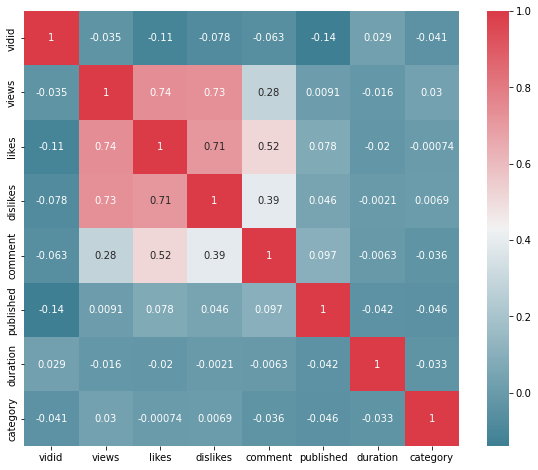

In [100]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
corr = test_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220,10,as_cmap=True),
            square=True,ax=ax,annot=True)
plt.show()

In [101]:
test_data=test_data.drop(['vidid'],axis=1)
test_data.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = test_data
X_test = scaler.fit_transform(X_test)

In [107]:
prediction = model.predict(X_test)

268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [108]:
prediction = pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [111]:
prediction = prediction.rename(columns={0:"Predicted_Adview"})
prediction.head()

,Predicted_Adview
0,2368.693604
1,2480.514160
2,29.458721
3,719.204102
4,2426.175049


In [112]:
#Adding predictions to the data
test_data['predicted_adview']=prediction
test_data.head()

,views,likes,dislikes,comment,published,duration,category,predicted_adview
0,440238,6153,218,1377,2053,449,2,2368.693604
1,1040132,8171,340,1047,1825,389,6,2480.514160
2,28534,31,11,1,1009,2274,4,29.458721
3,1316715,2284,250,274,116,595,7,719.204102
4,1893173,2519,225,116,1892,188,2,2426.175049


In [114]:
# Save the predictions to a CSV file
output_path = 'PredictedAdview.csv'
test_data.to_csv(output_path, index=False)